## Introduction

Heart disease stands as the foremost cause of mortality across diverse demographics within the United States, exerting a significant toll on both men and women of various racial and ethnic backgrounds. The staggering statistics provided by the Centres for Disease Control and Prevention (2023) underscore the urgency of this health crisis, revealing that one individual succumbs to cardiovascular disease every 33 seconds in the nation. In the grim landscape of 2021, approximately 695,000 lives were claimed by heart disease, translating to a harrowing reality where one out of every five deaths can be attributed to this pervasive condition.

This project focuses on utilizing machine learning algorithms, specifically logistic regression, and support vector machines (SVM), to diagnose the presence of a heart attack based on a dataset comprising 13 features. Beginning with data cleaning and exploratory data analysis (EDA) to ensure data integrity and gain insights into feature relationships, the project proceeds to feature engineering to enhance predictive power. Subsequently, logistic regression and SVM models are trained and fine-tuned through hyperparameter tuning. Through rigorous evaluation using metrics like accuracy, precision, recall, and F1-score, the project compares the performance of both models in heart attack diagnosis. By undertaking data preprocessing, model training, and evaluation, this project aims to identify the most effective approach for early detection of heart disease, contributing to improved healthcare decision-making and patient outcomes.

## Dataset

The dataset under examination comprises 13 distinct features and encompasses approximately 307 individual samples. These features encompass a range of vital health indicators, including:

1.Age: The age of the patient.

2.Sex: The gender of the patient.

3.exang: Exercise-induced angina (1 = yes; 0 = no).

4.ca: Number of major vessels (0-3).

5.cp: Chest Pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).

6.trtbps: Resting blood pressure (in mm Hg).

7.chol: Cholesterol level in mg/dl as measured by a BMI sensor.

8.fbs: Fasting blood sugar (> 120 mg/dl) (1 = true; 0 = false).

9.rest_ecg: Resting electrocardiographic results (0: normal, 1: ST-T wave abnormality, 2: probable or definite left ventricular hypertrophy).

10.thalach: Maximum heart rate achieved.

11.oldpeak: Previous peak

12.slp: Variable representing the slope of the peak exercise ST segment.

13.thall: the Thallium stress test result.


Finally, output (target) refers to the presence or absence of heart attack and/or disease.

Link to dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

# Task 1: Data Exploration and Preprocessing

Data exploration and preprocessing are crucial initial steps in the data analysis workflow, laying the foundation for subsequent tasks. Through exploration, we gain a comprehensive understanding of the dataset's structure, distribution, and relationships, enabling us to uncover patterns, anomalies, and insights that may inform subsequent analysis decisions. Preprocessing tasks, including handling missing values, outliers, and inconsistencies, are essential for ensuring data quality and integrity, mitigating the risk of biased results and inaccurate conclusions. Furthermore, preprocessing facilitates feature engineering, where we transform or create new features to improve model performance. By addressing noise, outliers, and irrelevant features, preprocessing enhances the predictive power of models, leading to more accurate and robust results.

## **Import the libraries**

In [1]:
# Task 1: Data exploration and pre-processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## **Import the dataset**

In [2]:
data = pd.read_csv("heart.csv")

## **Checking for null and duplicated values**

- Null values were checked, and it was confirmed that there are none present in the dataset.

- Outliers were identified (74 outliers) and removed using the interquartile range (IQR) method.

- Duplicate records were dropped to ensure data integrity and consistency.


In [23]:
# Task 1. Checking for null values 
print(data.isnull().sum())

# If there were null values, data.dropna() would have been used. 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [24]:
#Checking for duplicates

#print(data.duplicated().sum()) # Since there is one duplicated value, we must drop it
data.drop_duplicates(inplace=True)

print(data.duplicated().sum()) # To double check that the duplicated value has been dropped, which it has been.

0


In [28]:
# Task 1. Dealing with outliers

# Calculate IQR for each numerical column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Identify outliers before dropping
outliers_before = ((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)

# Drop outliers
data.drop(data[outliers_before].index, inplace=True)

# Recalculate IQR for each numerical column after dropping outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers after dropping
outliers_after = ((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)

# Count the number of outliers after dropping
num_outliers_after = outliers_after.sum()
print("Number of outliers after dropping them:", num_outliers_after)


Number of outliers after dropping them: 0


## **Exploratory data analysis**

•	The dataset and its features were described to understand their nature and characteristics.

•	Main statistics, including measures of central tendency and dispersion, were computed for numerical features to gain insights into their distributions.

•	Visualizations such as histograms, box plots, and scatter plots (pair plot) were utilized to explore the relationships between features and identify potential patterns or trends.


In [32]:
# Task 1. Data description 

data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       226 non-null    int64  
 1   sex       226 non-null    int64  
 2   cp        226 non-null    int64  
 3   trtbps    226 non-null    int64  
 4   chol      226 non-null    int64  
 5   fbs       226 non-null    int64  
 6   restecg   226 non-null    int64  
 7   thalachh  226 non-null    int64  
 8   exng      226 non-null    int64  
 9   oldpeak   226 non-null    float64
 10  slp       226 non-null    int64  
 11  caa       226 non-null    int64  
 12  thall     226 non-null    int64  
 13  output    226 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.5 KB


In [30]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.0,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,53.265487,0.676991,0.942478,128.429204,241.712389,0.0,0.548673,151.349558,0.314159,0.945575,1.451327,0.477876,2.314159,0.579646
std,9.233772,0.468664,1.020353,15.193766,43.774691,0.0,0.516245,22.196234,0.465211,1.039830,0.588650,0.700442,0.560534,0.494711
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.250000,0.0,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.500000,0.000000,0.600000,1.500000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.0,1.000000,168.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,354.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [31]:
data['output'].value_counts() # The output values are 1: chance of heart attack, or 0: no heart attack.

output
1    131
0     95
Name: count, dtype: int64

In [33]:
data.shape # After dropping duplicates and outliers, the rows decreased!

(226, 14)

## Data visualization

•	Bar plots were used to visualize the distribution of binary classification labels (0 and 1).

•	Pair plots were generated to visualize the pairwise relationships between multiple numerical features, facilitating a comprehensive understanding of their correlations and distributions.


<Axes: xlabel='output', ylabel='count'>

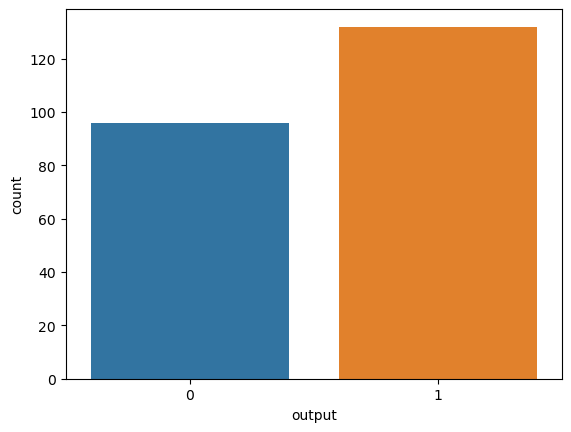

In [6]:
# Task 1. Using appropriate plots to visualize the data

sns.countplot(x = "output", data = data)

# It seems that the prediction of those with heart attack is more than those who don't have a heart attack.

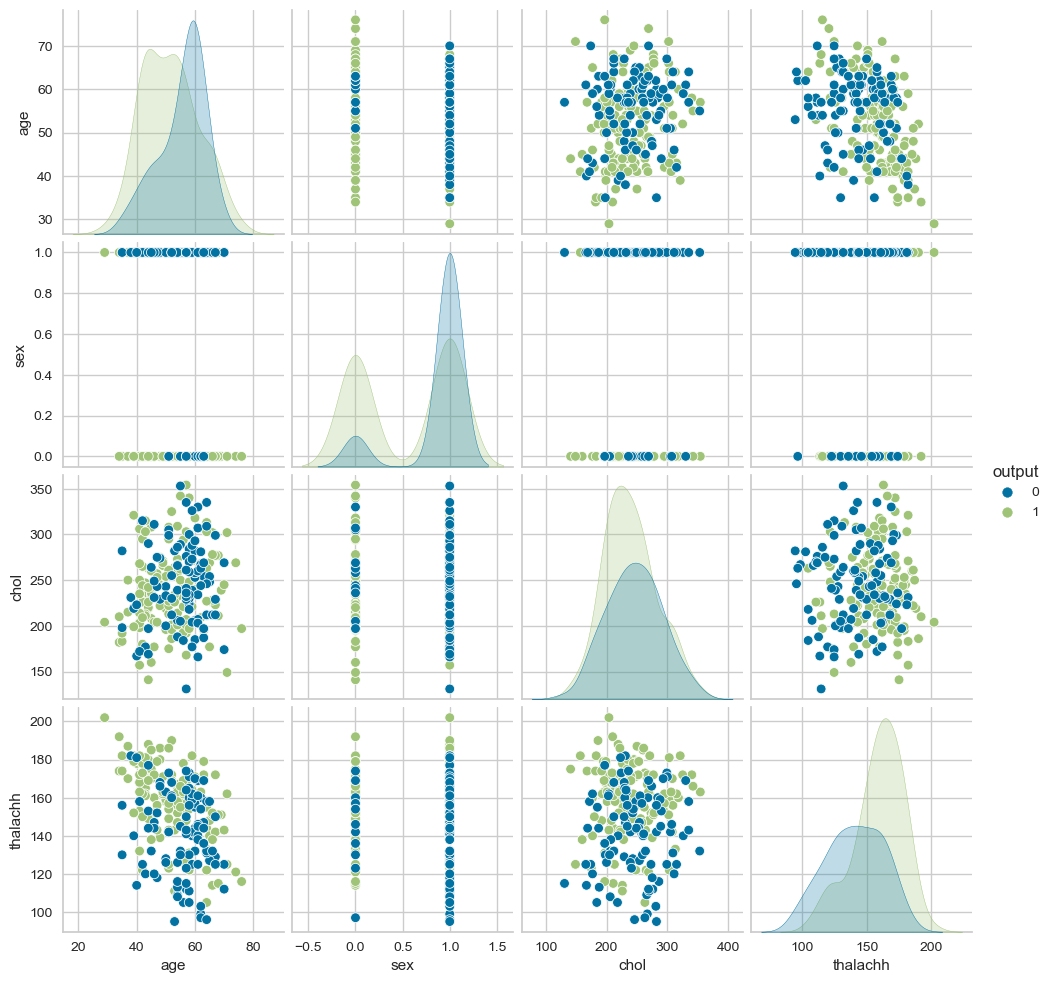

In [41]:
# Task 1. Using appropriate plots to visualize the data 2

sns.pairplot(data[["age", "sex", "chol", "output", "thalachh"]], hue = "output") 

# this shows the clustering of the output (0,1) across all features in the dataset.

## **Feature engineering**

To prioritize feature engineering efforts effectively, understanding the order of feature importance is crucial, as it allows us to allocate resources to the most impactful features, ultimately improving model performance. RandomForestClassifier was used to do so.

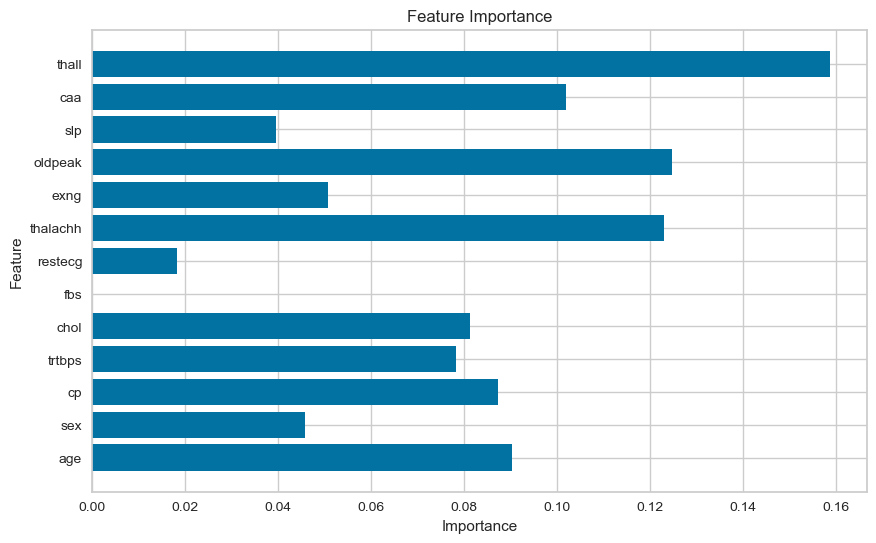

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop(columns=["output"])
y = data["output"]

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_

# Step 5: Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

By engineering features, we can highlight important patterns, relationships, and signals hidden within the data, improving the performance of our models. Whether it's encoding categorical variables, scaling numerical features, or creating new features based on domain knowledge, feature engineering helps models better understand and learn from the data, ultimately leading to more accurate predictions and better insights.

Out of the eight ways you can engineer features, I focused on enhancing the predictive power of the dataset by applying various techniques, including handling skewed distributions, encoding categorical variables, and feature scaling using StandardScaler(). Skewed distributions can negatively impact model performance, so I transformed skewed features using techniques like logarithmic transformation to make them more symmetric. Additionally, encoding categorical variables allows the incorporation of categorical data into machine learning models by converting them into numerical representations. Lastly, feature scaling using StandardScaler() ensures that all features are on the same scale, preventing certain features from dominating others during model training.

In [9]:
# Task 2: Feature engineering 

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

""""# Feature engineering technique: Handling skewed distributions
# Rationale: Since all continuous features are dispersed, it is our goal to make them about the same range"""

data_featured = data

# age
data_featured['age'] = pd.cut(data_featured['age'], bins=10, labels=range(10))
# resting blood pressure
data_featured['trtbps'] = pd.cut(data_featured['trtbps'], bins=10, labels=range(10))
# cholesterol
data_featured['chol'] = pd.cut(data_featured['chol'], bins=10, labels=range(10))
# maximum heart rate achieved
data_featured['thalachh'] = pd.cut(data_featured['thalachh'], bins=10, labels=range(10))

"""# Feature engineering technique: Encoding categorical features
# Rationale: so that each categorical variable will be replaced by a set of binary columns
#indicating the presence of absence of each category"""

data_featured = pd.get_dummies(data_featured, columns = categorical_features, drop_first = True) 

## **Logistic regression**

I performed a machine learning model development process on the dataset, focusing on classification since the task involves comparing the performance of logistic regression and Support Vector Machine (SVM) models. The dataset was split into training and testing sets to ensure unbiased evaluation. Logistic regression and SVM were chosen as appropriate algorithms for classification due to their effectiveness in handling binary classification tasks. Both models were trained using the training set and evaluated using performance metrics such as accuracy, precision, recall, and F1-score. 

In [59]:
# Task 3: Machine learning model deployment (Logistic regression)

"""I chose classification to classify the outputs (1,0) to heart attack presence or absence.
Then for comparison sake, I will run SVM and see which model predicts heart attack presence with a higher accuracy"""

# Define the features and target (we will be working on the featured dataset first)

x = data_featured.drop(['output'],axis=1)
y = data_featured[['output']]

# Feature scaling
scaler = RobustScaler()
x[continuous_features] = scaler.fit_transform(x[continuous_features])

# Spliting the dataset into train and test sets
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.33, random_state=42)

clf = LogisticRegression()

# train the classifier
clf.fit(x_train_lr, y_train_lr)

# calculating the probabilities
y_pred_proba = clf.predict_proba(x_test_lr)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(y_test_lr, y_pred)*100,"%")

The test accuracy score of Logistic Regression Classifier is  78.94736842105263 %


## **SVM**

In [11]:
# Task 3: Machine learning model deployment (SVM)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, test_size=0.33, random_state=42)

# Initialize SVM model
svm_model = SVC()

# Train SVM
svm_model.fit(x_train_svm, y_train_svm)

# Predict using SVM
y_pred_svm = svm_model.predict(x_test_svm)

# Evaluate and print scores for SVM
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print("SVM Accuracy:", accuracy_svm*100,"%")

SVM Accuracy: 76.31578947368422 %


## **Classification report and confusion matrix**

Accuracy represents the proportion of correctly classified instances, precision measures the proportion of true positive predictions among all positive predictions, recall measures the proportion of true positive predictions among all actual positive instances, and F1-score is the harmonic mean of precision and recall, providing a balance between them. Evaluating the models is important to assess their effectiveness in making predictions on unseen data and to identify the best-performing model for deployment in real-world applications.

In [66]:
# Task 4: Model-evaluation and fine-tuning 

"""The algorithm with the higher accuracy turned out to be the logistic regression classifier,
with an accuracy of 79% in comparison to SVM which gave us an accuracy of 76%"""

# Evaluation metrics for Logistic regression classifier

conf_matrix_lr = confusion_matrix(y_test_lr, y_pred)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

Confusion Matrix (Logistic Regression):
[[23  8]
 [ 8 37]]


In [65]:
# Generate and print the classification report
report_lr = classification_report(y_test_lr, y_pred)
print("Classification Report (Logistic Regression):")
print(report_lr)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        31
           1       0.82      0.82      0.82        45

    accuracy                           0.79        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



## **Hyperparameter tuning**


This step aims to optimize the logistic regression model's performance in predicting heart disease presence or absence. We start by splitting the dataset into training and testing sets for model evaluation. Then, we conduct a grid search with cross-validation to find the best hyperparameter combination, including regularization strength (C) and penalty type (penalty), for the logistic regression model. Regularization strength (C) controls the level of regularization applied during training to prevent overfitting. L1 Penalty (Lasso Regression) encourages sparsity in the model by driving some coefficients to zero, while L2 Penalty (Ridge Regression) penalizes large coefficients without forcing them to zero. Adjusting the regularization strength (C) balances model complexity and performance on unseen data. After tuning, we train the model with optimal hyperparameters and assess its performance using accuracy, classification report, and confusion matrix. 

In [69]:
# Task 4: Model evaluation and fine-tuning

# Initialize a dictionary to store model results
model_result_Hyperparameter = {}

# Splitting the dataset into train and test sets
x_train_hyper, x_test_hyper, y_train_hyper, y_test_hyper = train_test_split(x, y, test_size=0.33, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression model
lr = LogisticRegression()

# Perform grid search with cross-validation for Logistic Regression
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train_hyper, y_train_hyper)

# Print the best hyperparameters found for Logistic Regression
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best Logistic Regression model from grid search
best_lr = grid_search.best_estimator_

# Predict using the best Logistic Regression model
y_pred_hyper = best_lr.predict(x_test_hyper)

# Calculate accuracy for Logistic Regression after hyperparameter tuning
accuracy_hyper = accuracy_score(y_test_hyper, y_pred_hyper)
print("Accuracy (Logistic Regression - Hyperparameter Tuning):", accuracy_hyper)
model_result_Hyperparameter["LogisticRegression"] = accuracy_hyper

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Accuracy (Logistic Regression - Hyperparameter Tuning): 0.7894736842105263


In [73]:
# Generate and print the confusion matrix for Logistic Regression
conf_matrix_hyper = confusion_matrix(y_test_hyper, y_pred_hyper)
print("Confusion Matrix (Logistic Regression - Hyperparameter Tuning):")
print(conf_matrix_hyper)

Confusion Matrix (Logistic Regression - Hyperparameter Tuning):
[[21 10]
 [ 6 39]]


In [72]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_hyper, y_pred_hyper))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.80      0.87      0.83        45

    accuracy                           0.79        76
   macro avg       0.79      0.77      0.78        76
weighted avg       0.79      0.79      0.79        76



Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves splitting the dataset into multiple subsets, called folds. The model is trained on a subset of the data and evaluated on the remaining data. This process is repeated multiple times, with different subsets used for training and evaluation each time, which is important to assess the generalization performance of the model and ensure its reliability.

In [71]:
# Perform cross-validation for Logistic Regression
cross_val_scores = cross_val_score(best_lr, x_train_hyper, y_train_hyper, cv=5, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cross_val_scores.mean()*100,"%")

Cross-Validation Mean Accuracy: 82.90322580645162 %


After executing hyperparameter tuning and cross-validation, we observed an enhancement in the accuracy of the logistic regression model. Initially, the accuracy stood at approximately 79%. However, following the fine-tuning process, the accuracy increased marginally to around 83%, indicating the effectiveness of selecting the optimal hyperparameters. Notably, the best hyperparameters identified were a regularization strength (C) value of 10 and an L2 penalty. Additionally, by incorporating cross-validation, we further refined the model, resulting in a modest improvement in accuracy from approximately 79% to about 83%. These findings underscore the significance of hyperparameter tuning and cross-validation in optimizing the predictive performance of the logistic regression model for heart disease diagnosis.

## Model deployment

In [74]:
data2 = load_data("heart.csv")

Drop_column = ["output"]
data2.drop(columns=Drop_column, inplace=True)

In [75]:
data2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


This code snippet utilizes PyCaret, scikit-learn, and pandas to automate the classification model selection and tuning process. It loads our dataset named 'heart.csv', sets up PyCaret for classification, compares models to identify the best-performing one, and constructs a pipeline combining feature selection and logistic regression. Hyperparameters for the pipeline are defined and tuned using a grid search approach. The resulting tuned model is optimized for predicting heart disease presence or absence.

In [76]:
from pycaret.classification import setup, compare_models, tune_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import pandas as pd

# Load your dataset
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('heart.csv')

# Set up PyCaret
setup(data=data, target='output')

# Compare models
best_model = compare_models(fold=5, sort='F1')

# Define pipeline
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('lr', LogisticRegression())
])

# Define hyperparameter grid
param_grid = {
    'select__k': [1, 2, 3, 4, 5],
    'lr__C': [0.001, 0.01, 0.1, 1, 10]
}

# Tune model
tuned_lr = tune_model(pipeline, custom_grid=param_grid)


,Description,Value
0,Session id,2178
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8209,0.8995,0.8783,0.8118,0.8418,0.6360,0.6427,0.0220
lda,Linear Discriminant Analysis,0.8209,0.9000,0.8783,0.8118,0.8418,0.6360,0.6427,0.0100
rf,Random Forest Classifier,0.8207,0.8892,0.8522,0.8256,0.8371,0.6375,0.6412,0.0540
et,Extra Trees Classifier,0.8162,0.9033,0.8609,0.8170,0.8360,0.6276,0.6336,0.0400
nb,Naive Bayes,0.8210,0.9000,0.8522,0.8324,0.8350,0.6382,0.6494,0.0100
lr,Logistic Regression,0.8116,0.9005,0.8696,0.8023,0.8327,0.6174,0.6241,1.5980
lightgbm,Light Gradient Boosting Machine,0.7930,0.8636,0.8348,0.7926,0.8121,0.5816,0.5855,0.0440
qda,Quadratic Discriminant Analysis,0.7976,0.8825,0.8000,0.8299,0.8093,0.5929,0.6005,0.0160
dt,Decision Tree Classifier,0.7787,0.7729,0.8522,0.7739,0.8079,0.5497,0.5599,0.0120
xgboost,Extreme Gradient Boosting,0.7791,0.8547,0.8261,0.7795,0.8015,0.5529,0.5556,0.3120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9500,0.6667,1.0000,0.8000,0.6452,0.6901
1,0.7727,0.8083,0.7500,0.8182,0.7826,0.5455,0.5477
2,0.6667,0.6019,0.9167,0.6471,0.7586,0.2687,0.3151
3,0.8095,0.8241,0.7500,0.9000,0.8182,0.6216,0.6331
4,0.8095,0.8704,0.9167,0.7857,0.8462,0.6000,0.6124
5,0.9048,0.9818,1.0000,0.8462,0.9167,0.8073,0.8228
6,0.8095,0.9636,0.6364,1.0000,0.7778,0.6250,0.6742
7,0.8095,0.9727,0.9091,0.7692,0.8333,0.6147,0.6264
8,0.7619,0.8182,0.8182,0.7500,0.7826,0.5205,0.5230


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Streamlit model deployment

Streamlit is a popular Python library used for building interactive web applications for machine learning and data science projects. It simplifies the process of creating and sharing data-driven applications, allowing for rapid development and deployment without the need for extensive web development experience. However, to run the model, make sure that you are running it on your environment. I used visual studio for this endeavour and the code will be on my GitHub.

In [18]:
import pickle 
filename = "heart.sav"
pickle.dump(clf, open(filename, "wb"))

# The VS file will be uploaded on Github

"""import streamlit as st 
import pickle
import pandas as pd 

st.title("Heart attack prediction")
st.info("Please fill out the sections below")
st.sidebar.header("Diagnosis")

# Load the trained model
with open("heart.sav", "rb") as file:
    clf = pickle.load(file)

# Input fields
age = st.text_input('age')
trtbps = st.text_input('trtbps')
chol = st.text_input('chol')
thalachh = st.text_input('thalachh')
oldpeak = st.text_input('oldpeak')
sex_1 = st.text_input('sex')
cp_1 = st.text_input('cp')
cp_2 = st.text_input('cp_2')
cp_3 = st.text_input('cp_3')
restecg_1 = st.text_input('restecg_1')
restecg_2 = st.text_input('restecg_2')
exng_1 = st.text_input('exng_1')
slp_1 = st.text_input('slp_1')
slp_2 = st.text_input('slp_2')
caa_1 = st.text_input('caa_1')
caa_2 = st.text_input('caa_2')
thall_2 = st.text_input('thall_2')
thall_3 = st.text_input('thall_3')

# Create a DataFrame with user inputs
dataset = pd.DataFrame({
    'age': [age],
    'trtbps': [trtbps],
    'chol': [chol],
    'thalachh': [thalachh],
    'oldpeak': [oldpeak],
    'sex_1': [sex_1],
    'cp_1': [cp_1],
    'cp_2': [cp_2],
    'cp_3': [cp_3],
    'restecg_1': [restecg_1],
    'restecg_2': [restecg_2],
    'exng_1': [exng_1],
    'slp_1': [slp_1],
    'slp_2': [slp_2],
    'caa_1': [caa_1],
    'caa_2': [caa_2],
    'thall_2': [thall_2],
    'thall_3': [thall_3]
})

# Prediction button
confirm_button = st.sidebar.button('Confirm')
if confirm_button:
    result = clf.predict(dataset)
    st.write(result)
"""

## Conclusion

In conclusion, the data analysis and machine learning tasks undertaken provided valuable insights into the dataset and its predictive modelling potential for heart disease diagnosis. Through exploratory data analysis, we gained a comprehensive understanding of the dataset's characteristics, distributions, and relationships among features. This informed subsequent preprocessing steps, including handling outliers, dealing with missing values, and feature engineering, which improved the quality of the data and enhanced the performance of machine learning models. The comparison between logistic regression and SVM models revealed logistic regression as the superior performer, achieving an accuracy of approximately 83% after hyperparameter tuning and cross-validation. These findings underscore the importance of thorough data analysis, preprocessing, and model selection in maximizing predictive performance for real-world applications.

Reflecting on the broader significance of data analysis and machine learning in real-world applications, it's evident that these techniques play a crucial role in various domains, including healthcare. By leveraging data-driven insights and predictive modeling, we can enhance decision-making processes, improve patient outcomes, and optimize resource allocation. In the context of heart disease diagnosis, accurate predictive models can aid healthcare professionals in early detection and intervention, ultimately saving lives and reducing healthcare costs. Furthermore, the iterative nature of data analysis and machine learning allows for continuous improvement and adaptation to evolving datasets and challenges, highlighting their ongoing relevance and value in addressing complex real-world problems. Overall, the combination of data analysis and machine learning holds immense potential for driving innovation, efficiency, and positive impact across diverse industries and societal contexts.


## Limitations

While this project yielded valuable insights and predictive models for heart disease diagnosis, it is important to acknowledge several limitations:

1.Small Dataset Size: The dataset used in this project contained a relatively small number of samples, consisting of approximately 300 instances and 13 features. The small dataset size may limit the generalizability of the models and their ability to capture complex patterns and relationships present in larger datasets.

2.Limited Feature Space: With only 13 features available for analysis, there may be important factors influencing heart disease diagnosis that are not captured in the dataset. This limited feature space could result in models that overlook critical predictive variables, potentially leading to suboptimal performance.

3.Model Diversity: While logistic regression and Support Vector Machine (SVM) are effective classifiers, the project could have benefitted from exploring a wider range of machine learning models. Models such as decision trees, random forests, gradient boosting, and neural networks offer diverse approaches to classification tasks and could have provided additional insights into heart disease diagnosis.


## References

Centers for Disease Control and Prevention. (2023, May 15). Heart Disease Facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm